# EBL  

In [2]:
import jetset
print('tested on jetset',jetset.__version__)

tested on jetset 1.3.0rc7


In [1]:
import warnings
warnings.filterwarnings('ignore')

## EBL models  

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from jetset.template_2Dmodel import EBLAbsorptionTemplate
ebl_dominguez_2010=EBLAbsorptionTemplate.from_name('Dominguez_2010_v2011')
ebl_dominguez_lopez=EBLAbsorptionTemplate.from_name('Dominguez_2023')
ebl_finke=EBLAbsorptionTemplate.from_name('Finke_2010')
ebl_franceschini=EBLAbsorptionTemplate.from_name('Franceschini_2008')


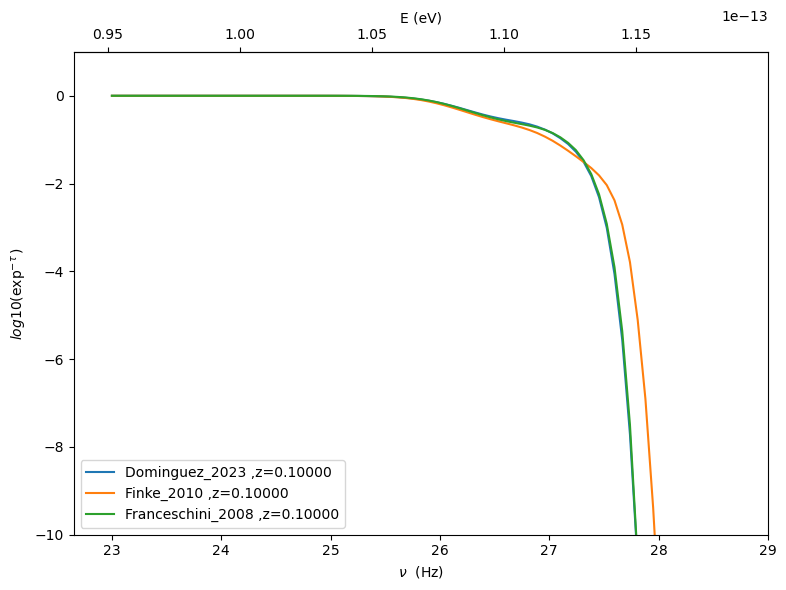

In [5]:
z=0.1
nu=np.logspace(23,30,100)
ebl_dominguez_lopez.parameters.z_cosm.val=z
ebl_dominguez_lopez.eval(nu=nu)
ebl_finke.parameters.z_cosm.val=z
ebl_finke.eval(nu=nu)
ebl_franceschini.parameters.z_cosm.val=z
ebl_franceschini.eval(nu=nu)
p=ebl_dominguez_lopez.plot_model()
ebl_finke.plot_model(p)
ebl_franceschini.plot_model(p)
p.setlim(y_max=1,y_min=-10,x_max=29)

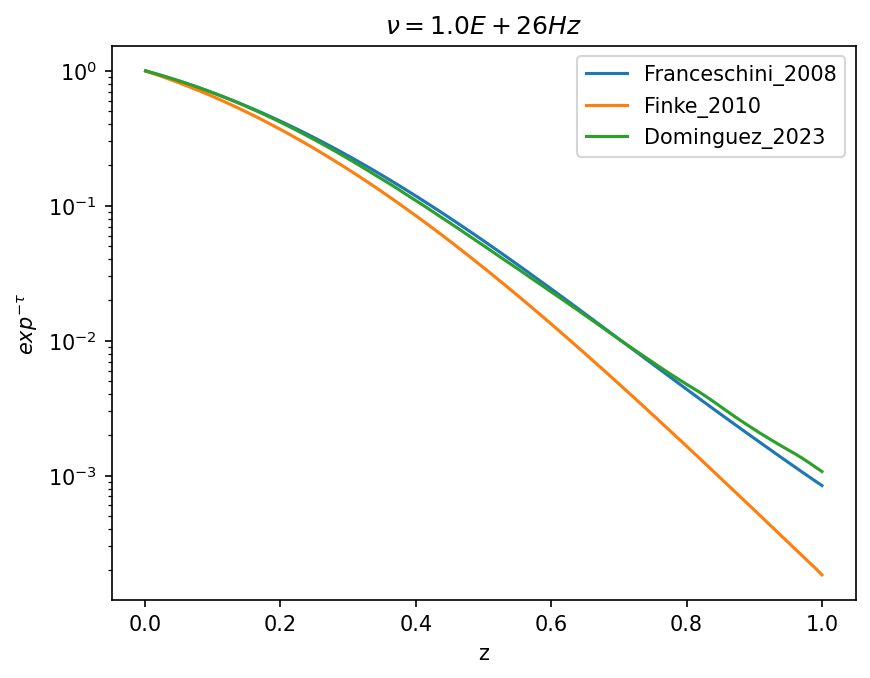

In [6]:
plt.figure(dpi=150)

nu=1E26
z_range=np.linspace(0.001,1,100)
y_fr = np.zeros(z_range.size)
y_fi = np.zeros(z_range.size)
y_do = np.zeros(z_range.size)
for ID,z in enumerate(z_range):
    ebl_franceschini.parameters.z_cosm.val=z
    ebl_finke.parameters.z_cosm.val=z
    ebl_dominguez_lopez.parameters.z_cosm.val=z
    y_fr[ID]=ebl_franceschini.eval(nu=nu,get_model=True)[0]
    y_fi[ID]=ebl_finke.eval(nu=nu,get_model=True)[0]
    y_do[ID]=ebl_dominguez_lopez.eval(nu=nu,get_model=True)[0]


plt.plot(z_range,y_fr,label='%s'%ebl_franceschini.name)
plt.plot(z_range,y_fi,label='%s'%ebl_finke.name)
plt.plot(z_range,y_do,label='%s'%ebl_dominguez_lopez.name)

plt.xlabel('z')
plt.ylabel(r'$exp^{-\tau}$')
plt.legend()
plt.semilogy()
t=plt.title(r'$\nu=%1.1E Hz$'%nu)

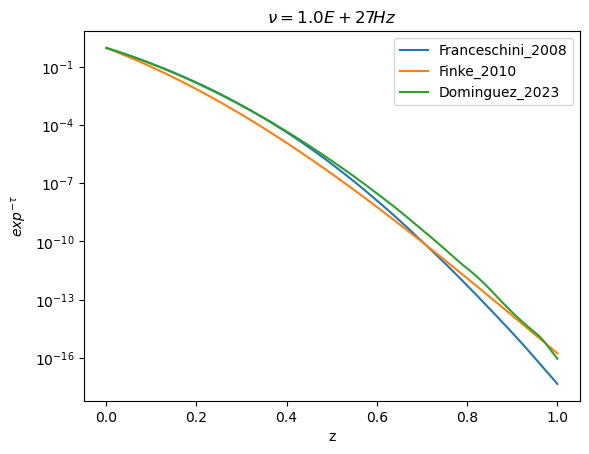

In [7]:
%matplotlib inline
z_range=np.linspace(0.001,1,100)
y_fr = np.zeros(z_range.size)
y_fi = np.zeros(z_range.size)
y_do = np.zeros(z_range.size)
nu=1E27
for ID,z in enumerate(z_range):
    ebl_franceschini.parameters.z_cosm.val=z
    ebl_finke.parameters.z_cosm.val=z
    ebl_dominguez_lopez.parameters.z_cosm.val=z
    y_fr[ID]=ebl_franceschini.eval(nu=nu,get_model=True)[0]
    y_fi[ID]=ebl_finke.eval(nu=nu,get_model=True)[0]
    y_do[ID]=ebl_dominguez_lopez.eval(nu=nu,get_model=True)[0]


plt.plot(z_range,y_fr,label='%s'%ebl_franceschini.name)
plt.plot(z_range,y_fi,label='%s'%ebl_finke.name)
plt.plot(z_range,y_do,label='%s'%ebl_dominguez_lopez.name)

plt.xlabel('z')
plt.ylabel(r'$exp^{-\tau}$')
plt.legend()
plt.semilogy()
t=plt.title(r'$\nu=%1.1E Hz$'%nu)

## Combine a Jet model with the EBL model 

As first step, we define our Jet model

In [8]:
from jetset.jet_model import Jet
from jetset.model_manager import FitModel

my_jet=Jet(electron_distribution='lppl',name='jet_leptonic')

===> setting C threads to 12


In [9]:
from jetset.template_2Dmodel import EBLAbsorptionTemplate
ebl_franceschini=EBLAbsorptionTemplate.from_name('Franceschini_2008')

In [10]:
composite_model=FitModel(nu_size=500,name='EBL corrected')
composite_model.add_component(my_jet)
composite_model.add_component(ebl_franceschini)


In [11]:
composite_model.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
jet_leptonic,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False


Since, both the Jet model the EBL share the same parameter, i.e. the redshift, we link the two parameters 

In [12]:
composite_model.link_par(par_name='z_cosm', from_model='Franceschini_2008', to_model='jet_leptonic')

adding par: z_cosm to  z_cosm


In [13]:
composite_model.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
jet_leptonic,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm(M),redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False


These methods are alternative ways to set a parameter in a composite model

In [14]:
composite_model.jet_leptonic.parameters.z_cosm.val=0.1
composite_model.set_par('jet_leptonic','z_cosm',0.1)
composite_model.set_par(my_jet,'z_cosm',0.1)

Since as default, added components are summed together, so we need to define the correct multiplicative for for the composite model.

In [15]:
composite_model.show_model_components()


--------------------------------------------------------------------------------
Composite model description
--------------------------------------------------------------------------------
name: EBL corrected  
type: composite_model  
components models:
 -model name: jet_leptonic model type: jet
 -model name: Franceschini_2008 model type: table2D

--------------------------------------------------------------------------------


This can be done just by writing the mathematical expression as a string, using the model names reported in the model description table, and that's it!

In [16]:
composite_model.composite_expr='jet_leptonic*Franceschini_2008'

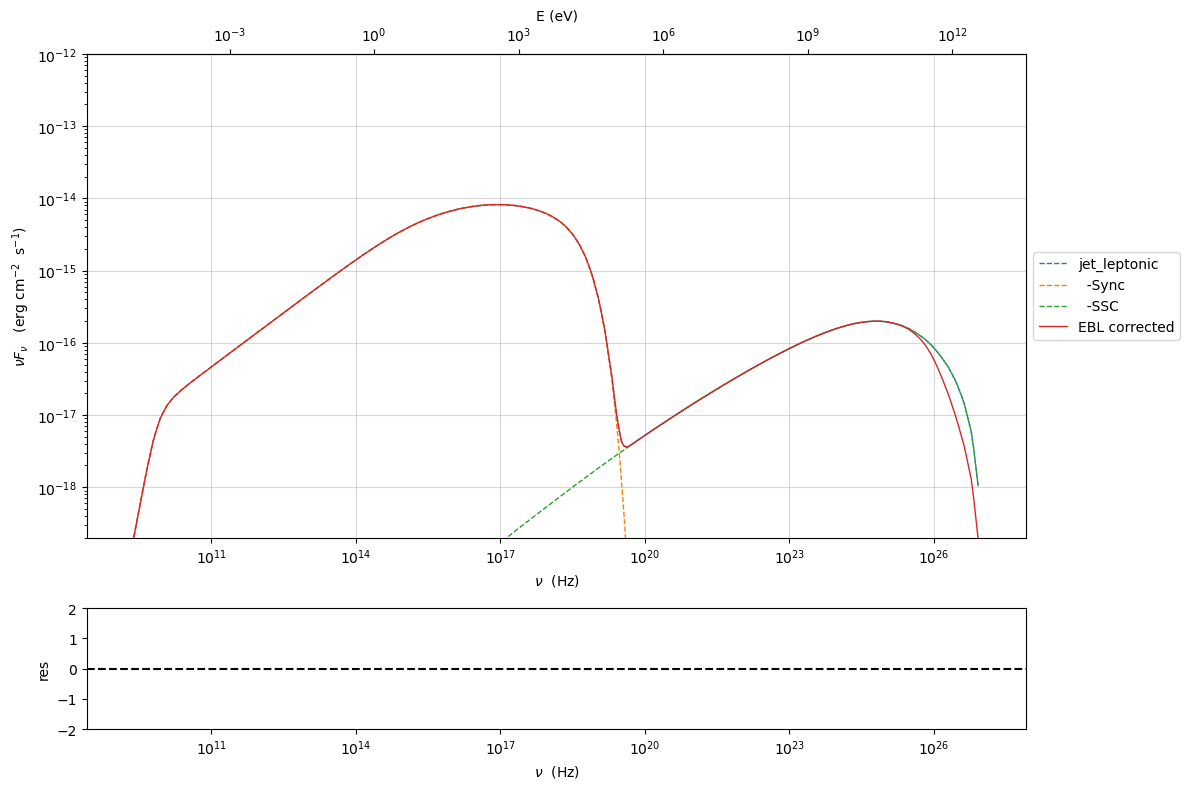

In [17]:
composite_model.jet_leptonic.IC_nu_size=150
composite_model.eval()
p=composite_model.plot_model()
p.setlim(y_max=1E-12)

if you want to remove the link from the parameter 

In [18]:
composite_model.parameters.reset_dependencies()

In [19]:
composite_model.parameters

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
jet_leptonic,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False


None

now the two `z_cosm` parameters are not linkend anymore

## Example of model fitting with EBL

In [20]:
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data

In [21]:
test_SEDs

['/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/jetset/test_data/SEDs_data/SED_3C345.ecsv',
 '/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/jetset/test_data/SEDs_data/SED_MW_Mrk421_EBL_DEABS.ecsv',
 '/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/jetset/test_data/SEDs_data/SED_MW_Mrk501_EBL_ABS.ecsv',
 '/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/jetset/test_data/SEDs_data/SED_MW_Mrk501_EBL_DEABS.ecsv']


***  binning data  ***
---> N bins= 90
---> bin_widht= 0.2



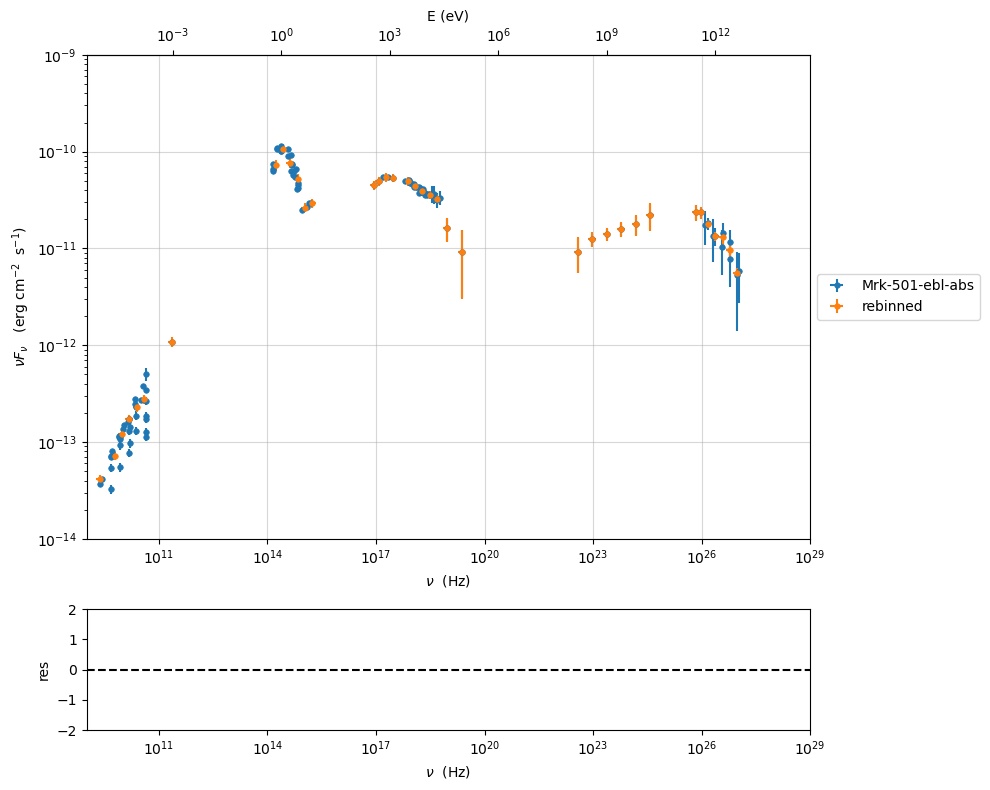

In [22]:
%matplotlib inline
data=Data.from_file(test_SEDs[2])
sed_data=ObsData(data_table=data)
myPlot=sed_data.plot_sed()

sed_data.group_data(bin_width=0.2)
sed_data.add_systematics(0.1,[10.**6,10.**29])
myPlot.add_data_plot(sed_data,label='rebinned')
myPlot.setlim(y_min=1E-14,y_max=1E-9,x_min=1E9,x_max=1E29)


*** evaluating spectral indices for data ***



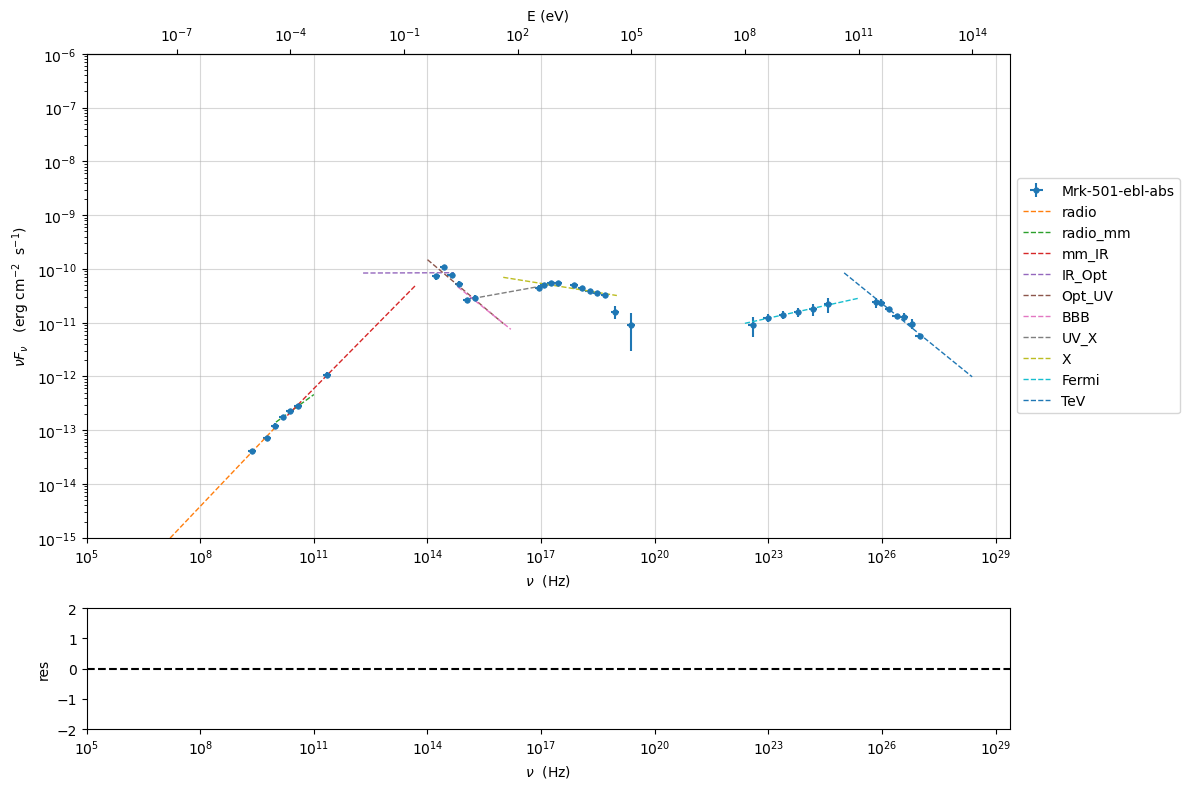

In [23]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(silent=True)
p=my_shape.plot_indices()
p.setlim(y_min=1E-15,y_max=1E-6)

In [24]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=True,
                  Ep_start=None,
                  minimizer='lsb',
                  silent=True,
                  fit_range=[10,21])


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 21]
---> class:  HSP

---> class:  HSP




model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-6.522794e-02,-6.522794e-02,5.892905e-03,--,-4.913172e-02,-1.000000e+01,0.000000e+00,False
LogCubic,c,-1.908748e-03,-1.908748e-03,8.488797e-04,--,5.440153e-03,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,1.704833e+01,1.704833e+01,6.858392e-02,--,1.593204e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.030052e+01,-1.030052e+01,1.424853e-02,--,-1.022242e+01,-3.000000e+01,0.000000e+00,False
host_galaxy,nuFnu_p_host,-1.008538e+01,-1.008538e+01,2.900917e-02,--,-1.022242e+01,-1.222242e+01,-8.222416e+00,False
host_galaxy,nu_scale,1.934519e-02,1.934519e-02,1.919833e-03,--,0.000000e+00,-5.000000e-01,5.000000e-01,False


---> sync       nu_p=+1.704833e+01 (err=+6.858392e-02)  nuFnu_p=-1.030052e+01 (err=+1.424853e-02) curv.=-6.522794e-02 (err=+5.892905e-03)




*** Log-Polynomial fitting of the IC component ***
---> fit range: [23, 29]
---> LogCubic fit
====> simplex
====> migrad
====> simplex
====> migrad
====> simplex
====> migrad
-------------------------------------------------------------------------
Fit report

Model: IC-shape-fit


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
LogCubic,b,curvature,,-1.569967e-01,-1.000000e+01,0.000000e+00,False,False
LogCubic,c,third-degree,,-4.422595e-02,-1.000000e+01,1.000000e+01,False,False
LogCubic,Ep,peak freq,Hz,2.530691e+01,0.000000e+00,3.000000e+01,True,False
LogCubic,Sp,peak flux,erg / (s cm2),-1.058920e+01,-3.000000e+01,0.000000e+00,True,False



converged=True
calls=99
mesg=


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.768                      │              Nfcn = 99               │
│ EDM = 1.26e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_0 │  -0.157   │   0.025   │            │            │   -10   │    0    │       │
│ 1 │ par_1 │  -0.044   │   0.020   │            │            │   -10   │   10    │       │
│ 2 │ par_2 │   25.31   │   0.18    │            │            │    0    │   30    │       │
│ 3 │ par_3 │  -10.59   │   0.05    │            │            │   -30   │    0    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

dof=7
chisq=2.767806, chisq/red=0.395401 null hypothesis sig=0.905619

stats without the UL
dof  UL=7
chisq=2.767806, chisq/red=0.395401 null hypothesis sig=0.905619


best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-1.569967e-01,-1.569967e-01,2.511269e-02,--,-1.000000e+00,-1.000000e+01,0.000000e+00,False
LogCubic,c,-4.422595e-02,-4.422595e-02,2.000320e-02,--,-1.000000e+00,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,2.530691e+01,2.530691e+01,1.798034e-01,--,2.536233e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.058920e+01,-1.058920e+01,4.983735e-02,--,-1.000000e+01,-3.000000e+01,0.000000e+00,False


-------------------------------------------------------------------------





model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-1.569967e-01,-1.569967e-01,2.511269e-02,--,-1.000000e+00,-1.000000e+01,0.000000e+00,False
LogCubic,c,-4.422595e-02,-4.422595e-02,2.000320e-02,--,-1.000000e+00,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,2.530691e+01,2.530691e+01,1.798034e-01,--,2.536233e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.058920e+01,-1.058920e+01,4.983735e-02,--,-1.000000e+01,-3.000000e+01,0.000000e+00,False


---> IC         nu_p=+2.530691e+01 (err=+1.798034e-01)  nuFnu_p=-1.058920e+01 (err=+4.983735e-02) curv.=-1.569967e-01 (err=+2.511269e-02)



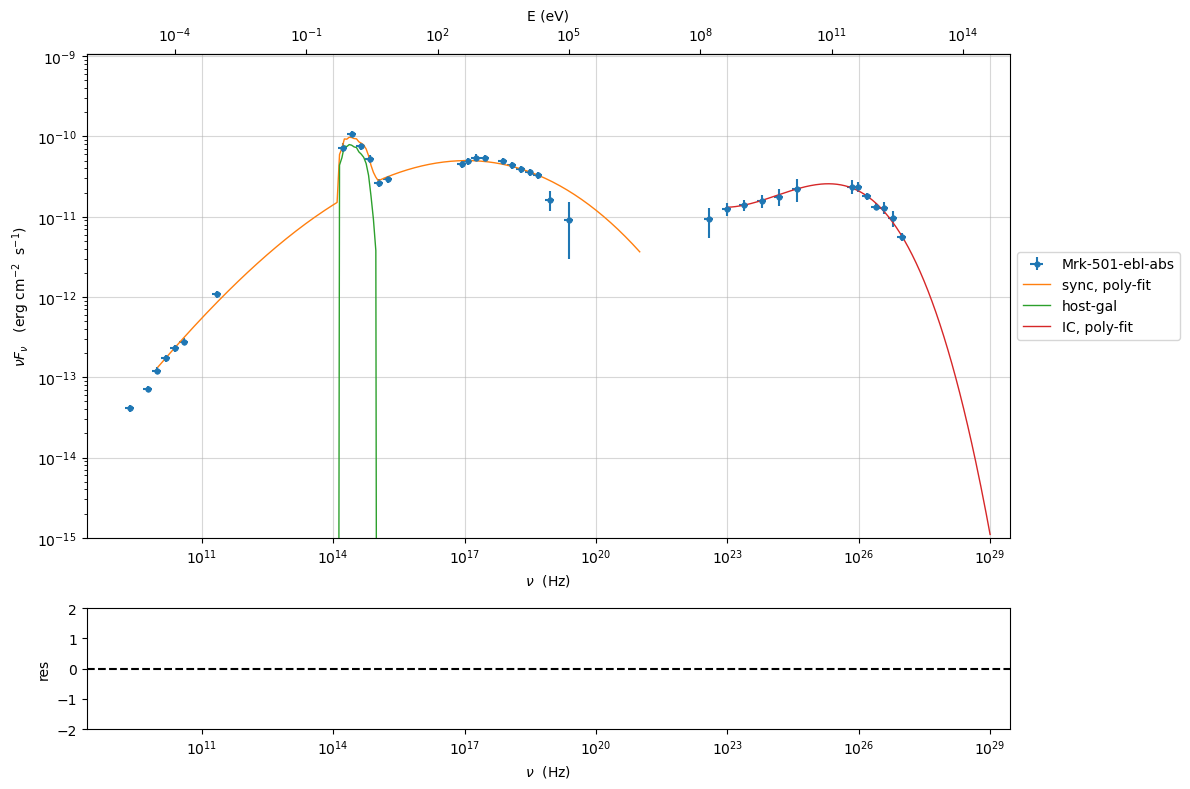

In [25]:
my_shape.IC_fit(fit_range=[23,29],minimizer='minuit')
p=my_shape.plot_shape_fit()
p.setlim(y_min=1E-15)

In [26]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='lppl',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E11,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False, silent=True)
prefit_jet.save_model('prefit_jet_gal_templ.pkl')


***  constrains parameters from observable ***

===> setting C threads to 12


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,1.153993e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,5.050000e-02,0.000000e+00,--,False,False
jet_leptonic,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
jet_leptonic,beam_obj,beaming,,2.500000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,3.360000e-02,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.487509e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,2.310708e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,2.237058e+01,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.107634e+04,1.000000e+00,1.000000e+09,False,False


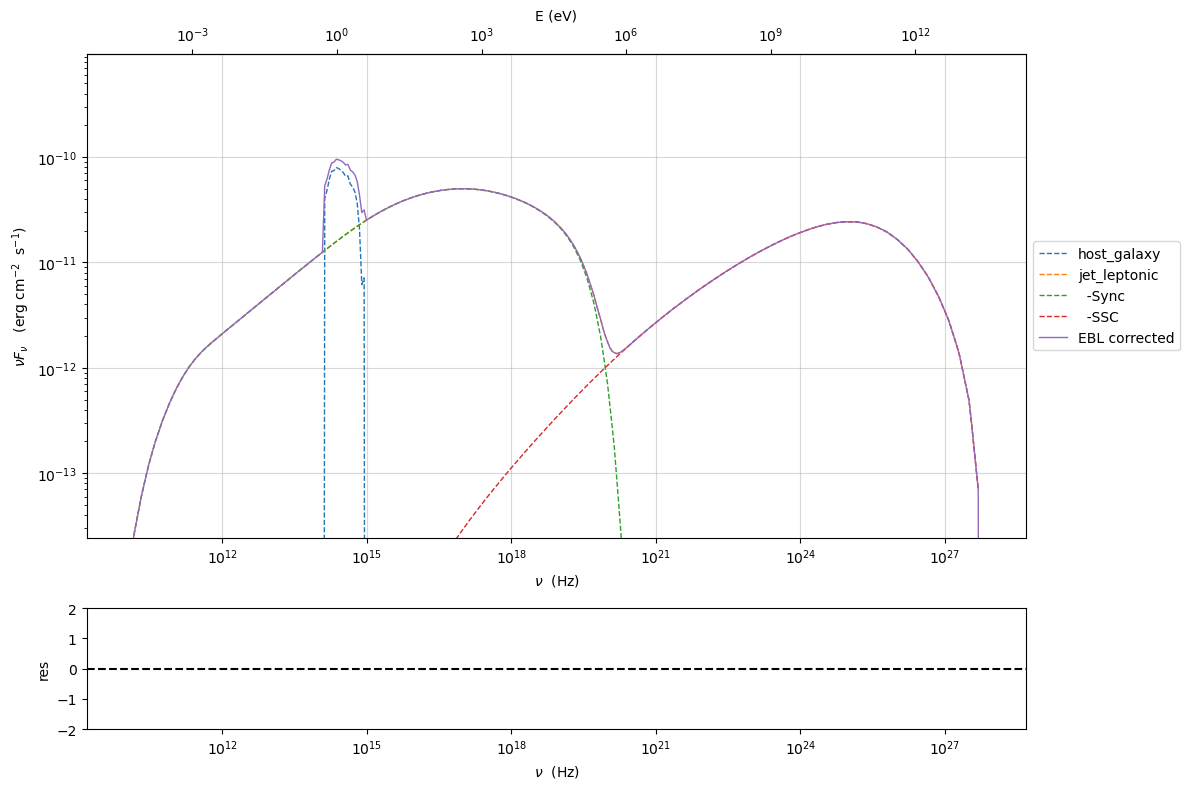

In [27]:
composite_model=FitModel(nu_size=500,name='EBL corrected',template=my_shape.host_gal)
composite_model.add_component(prefit_jet)
composite_model.eval()
composite_model.plot_model()

In [28]:
from jetset.template_2Dmodel import EBLAbsorptionTemplate
ebl_franceschini=EBLAbsorptionTemplate.from_name('Franceschini_2008')
composite_model.add_component(ebl_franceschini)

In [29]:
composite_model.link_par(par_name='z_cosm', from_model='Franceschini_2008', to_model='jet_leptonic')
composite_model.composite_expr='(jet_leptonic+host_galaxy)*Franceschini_2008'

adding par: z_cosm to  z_cosm


In [30]:
composite_model.show_model()


--------------------------------------------------------------------------------
Composite model description
--------------------------------------------------------------------------------
name: EBL corrected  
type: composite_model  
components models:
 -model name: host_galaxy model type: template
 -model name: jet_leptonic model type: jet
 -model name: Franceschini_2008 model type: table2D

--------------------------------------------------------------------------------
individual component description

--------------------------------------------------------------------------------
model description
--------------------------------------------------------------------------------
name: host_galaxy  
type: template  

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
host_galaxy,nuFnu_p_host,nuFnu-scale,erg / (s cm2),-1.008538e+01,-2.000000e+01,2.000000e+01,False,False
host_galaxy,nu_scale,nu-scale,Hz,1.934519e-02,-2.000000e+00,2.000000e+00,False,False


--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
model description: 
--------------------------------------------------------------------------------
type: Jet
name: jet_leptonic  
geometry: spherical  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 1.487509e+02
 gmax grid : 2.310708e+06
 normalization:  True
 log-values:  False
 ratio of cold protons to relativistic electrons: 1.000000e+00

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sum, hidden: False
   name:Sync, state: self-abs
   name:Sync, hidden: False
   name:SSC, state: on
   name:SSC, hidden: False
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+3

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,1.153993e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,5.050000e-02,0.000000e+00,--,False,False
jet_leptonic,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
jet_leptonic,beam_obj,beaming,,2.500000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm(M),redshift,,3.360000e-02,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.487509e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,2.310708e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,2.237058e+01,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.107634e+04,1.000000e+00,1.000000e+09,False,False


--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
model description
--------------------------------------------------------------------------------
name: Franceschini_2008  
type: table2D  

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
Franceschini_2008,scale_factor,scale_factor,,1.000000e+00,0.000000e+00,--,False,True
Franceschini_2008,"z_cosm(L,jet_leptonic)",redshift,,--,--,--,False,True


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


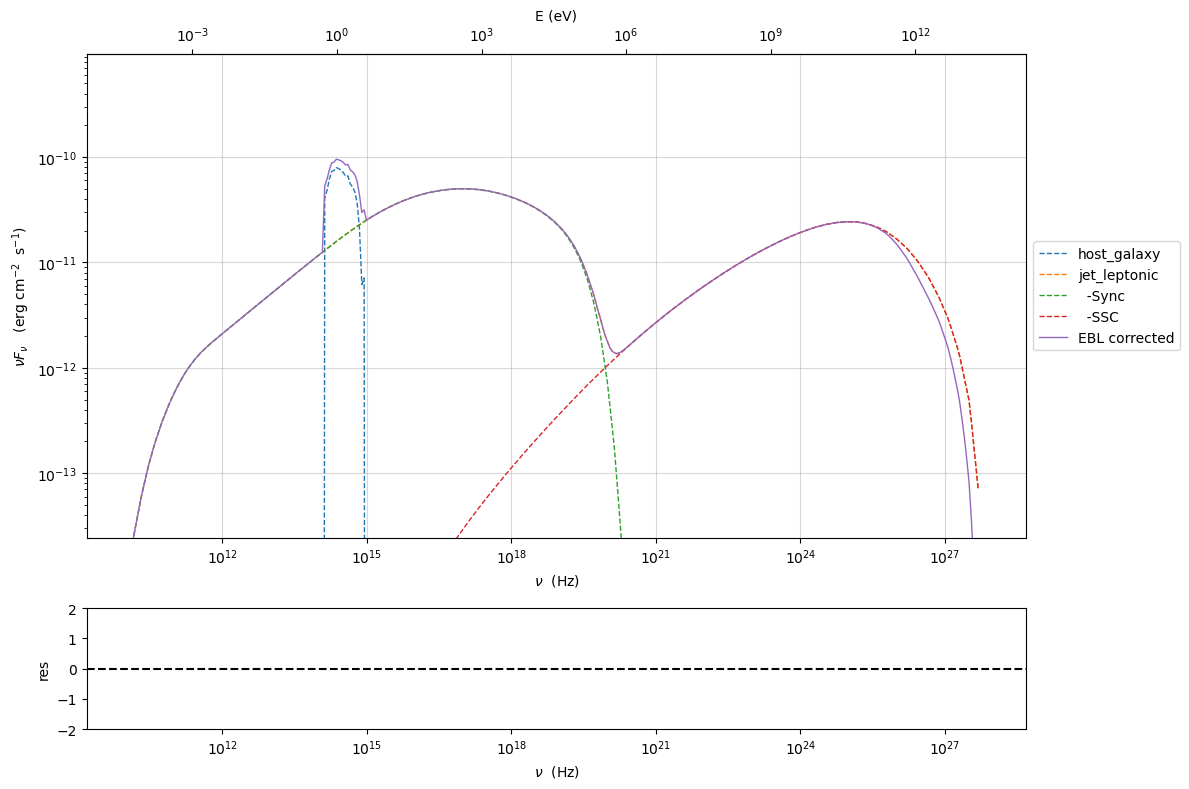

In [31]:
composite_model.eval()
composite_model.plot_model()

In [32]:
from jetset.minimizer import ModelMinimizer
from jetset.model_manager import  FitModel
from jetset.jet_model import Jet



composite_model.freeze(prefit_jet,'z_cosm')
composite_model.freeze(prefit_jet,'R_H')
composite_model.jet_leptonic.parameters.beam_obj.fit_range=[5,50]
composite_model.jet_leptonic.parameters.R.fit_range=[10**15.5,10**17.5]
composite_model.jet_leptonic.parameters.gmax.fit_range=[1E4,1E8]
composite_model.jet_leptonic.parameters.z_cosm.val=0.03


composite_model.host_galaxy.parameters.nuFnu_p_host.frozen=False
composite_model.host_galaxy.parameters.nu_scale.frozen=True
composite_model.jet_leptonic.nu_size=200
composite_model.jet_leptonic.IC_nu_size=100
model_minimizer_lsb=ModelMinimizer('lsb')
best_fit=model_minimizer_lsb.fit(composite_model,sed_data,1E11,1E29,fitname='SSC-best-fit-lsb',repeat=3)

filtering data in fit range = [1.000000e+11,1.000000e+29]
data length 31

*** start fit process ***
----- 
fit run: 0


0it [00:00, ?it/s]

- best chisq=1.05075e+01

fit run: 1
- old chisq=1.05075e+01


0it [00:00, ?it/s]

- best chisq=1.03861e+01

fit run: 2
- old chisq=1.03861e+01


0it [00:00, ?it/s]

- best chisq=1.03473e+01

-------------------------------------------------------------------------
Fit report

Model: SSC-best-fit-lsb


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
host_galaxy,nuFnu_p_host,nuFnu-scale,erg / (s cm2),-1.008256e+01,-2.000000e+01,2.000000e+01,False,False
host_galaxy,nu_scale,nu-scale,Hz,1.934519e-02,-2.000000e+00,2.000000e+00,False,True
jet_leptonic,R,region_size,cm,1.126068e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.449834e-02,0.000000e+00,--,False,False
jet_leptonic,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
jet_leptonic,beam_obj,beaming,,4.382890e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm(M),redshift,,3.000000e-02,0.000000e+00,--,False,True
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.304507e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.905419e+06,1.000000e+00,1.000000e+15,False,False



converged=True
calls=326
mesg=


'`ftol` termination condition is satisfied.'

dof=21
chisq=10.347315, chisq/red=0.492729 null hypothesis sig=0.974041

best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
host_galaxy,nuFnu_p_host,-1.008256e+01,-1.008256e+01,1.788949e-02,--,-1.008538e+01,-1.222242e+01,-8.222416e+00,False
host_galaxy,nu_scale,1.934519e-02,--,--,--,1.934519e-02,-5.000000e-01,5.000000e-01,True
jet_leptonic,R,1.126068e+16,1.126068e+16,1.680987e+16,--,1.153993e+16,3.162278e+15,3.162278e+17,False
jet_leptonic,R_H,1.000000e+17,--,--,--,1.000000e+17,0.000000e+00,--,True
jet_leptonic,B,1.449834e-02,1.449834e-02,1.028970e-02,--,5.050000e-02,0.000000e+00,--,False
jet_leptonic,NH_cold_to_rel_e,1.000000e+00,--,--,--,1.000000e+00,0.000000e+00,--,True
jet_leptonic,beam_obj,4.382890e+01,4.382890e+01,1.999181e+01,--,2.500000e+01,5.000000e+00,5.000000e+01,False
jet_leptonic,z_cosm(M),3.000000e-02,--,--,--,3.000000e-02,0.000000e+00,--,True
jet_leptonic,gmin,1.304507e+02,1.304507e+02,1.659813e+02,--,1.487509e+02,1.000000e+00,1.000000e+09,False
jet_leptonic,gmax,1.905419e+06,1.905419e+06,1.052149e+06,--,2.310708e+06,1.000000e+04,1.000000e+08,False


-------------------------------------------------------------------------




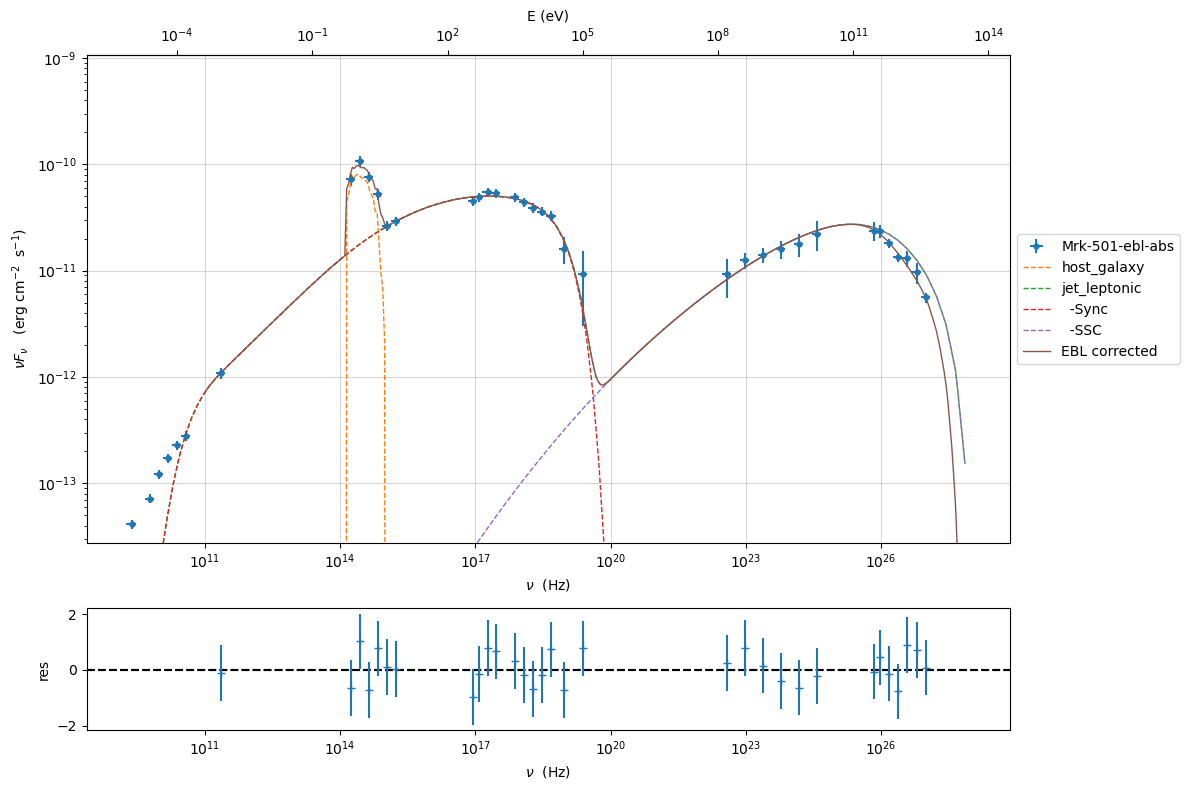

In [33]:
composite_model.nu_min=1E8
composite_model.jet_leptonic.nu_min=1E8
composite_model.eval()
p=composite_model.plot_model(sed_data=sed_data)